In [162]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

## Data Loading

Load the CSV file and look at the top 5 rows.

Seperate the csv file formating with a semi colunm

In [163]:
wwine = pd.read_csv("./data/winequality-white.csv", sep=';')
wwine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


Check to missing values

In [164]:
wwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Get information and description of our dataset

In [165]:
wwine.info()
wwine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Lets check our value counts for quality colunm

In [166]:
wwine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Data Pre-Processing

Using Classification: We are trying to find if a wine is Poor, Average or Excellent. We can adapt our quality colunm to by dividing our dataset into 3 classes. Poor: all wines with quality below 4.
Average: wines with quality 5 and 6.
Excellent: wines with quality higher than 7.

To do that, we will create another colunm called class and return either poor, average or good based on the quality

In [167]:
labels = ["poor", "average", "excellent"]
wwine['class'] = pd.cut(wwine['quality'], bins = 3, labels = labels)
wwine['class'].value_counts()

average      3078
poor         1640
excellent     180
Name: class, dtype: int64

Lets convert the labels to numerical values from categorical

In [168]:
wwine['class'] = pd.cut(wwine['quality'], bins = 3, labels = False)
wwine['class'].value_counts()

1    3078
0    1640
2     180
Name: class, dtype: int64

Lets check for correlation between all the colunms

In [169]:
# drop quality and class and check correlations between class and the rest of the colunms
correlations = wwine.corr()['class'].drop(['quality', 'class'])
correlations

fixed acidity          -0.094110
volatile acidity       -0.200274
citric acid            -0.004063
residual sugar         -0.092725
chlorides              -0.187810
free sulfur dioxide     0.004229
total sulfur dioxide   -0.171998
density                -0.280381
pH                      0.089337
sulphates               0.043495
alcohol                 0.404036
Name: class, dtype: float64

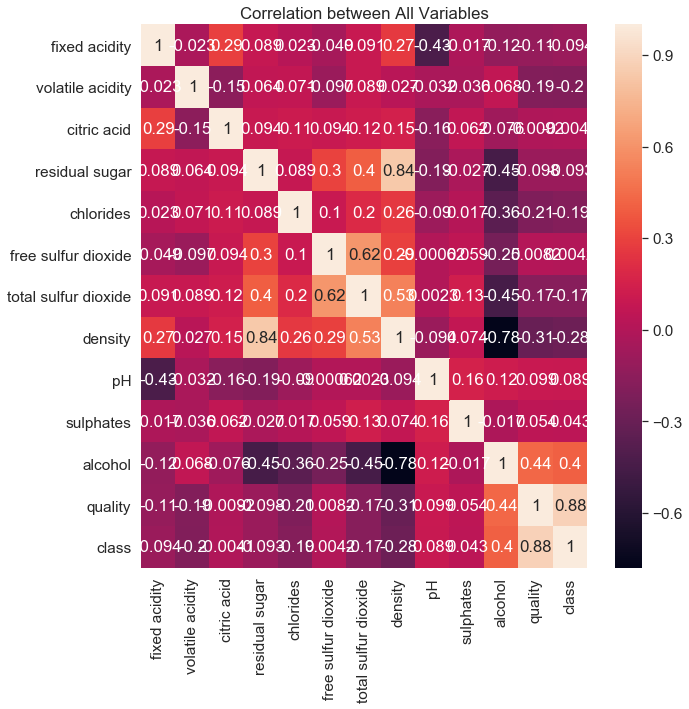

In [171]:
# sns.heatmap(wwine.corr())
corr = wwine.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between All Variables')
plt.show()

Next we create a training and test dataset without scaling

In [172]:
X = wwine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wwine['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33,random_state=123)

We standadise our train and tes data with StandardScaler()

In [178]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Cross Validation to pick the best models

We will be doing a cross validation to pick the best model by checking there cross_val_score against our scalled and non-scaled dataset. The higher the score the better the model fits

In [179]:
models = []
models.append(('RandomForest', RandomForestClassifier(n_estimators=100)))
models.append(('GradientBoosting', GradientBoostingClassifier(max_depth=5)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('GradientDescent', SGDClassifier()))
models.append(('SupportVectorClassifier', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))

In [180]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

RandomForest: 0.792129
GradientBoosting: 0.779937
NaiveBayes: 0.656193
GradientDescent: 0.597485
SupportVectorClassifier: 0.624201
KNN: 0.650716
DecisionTree: 0.718679


Based on the above result, RandomForest, GradientBoosting, DecisionTree and NaiveBayes and the best models. Lets try and use the scaled version of our dataset to see if there are any differences

Validation result With scaling

In [182]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

RandomForest: 0.789993
GradientBoosting: 0.779932
NaiveBayes: 0.657103
GradientDescent: 0.691546
SupportVectorClassifier: 0.745500
KNN: 0.719594
DecisionTree: 0.717169


Random forest result has been reduced to 0.78 from 0.79, While GradientDecent from 0.59 to 0.69, SVC from 0.62 to 0.7, and KNN from 0.65 to 0.71 had the biggest increases

Based on the scaling result, we will be checking our model using both the scaled and non scaled version of our data due the mixed results 

# RandomForest Model

In [219]:
RFmodel = RandomForestClassifier(n_estimators=100)
RFmodel.fit(X_train_scaled, y_train)

predicted_scaled = RFmodel.predict(X_test_scaled)
predicted = RFmodel.predict(X_test)

Score for scaled and non scaled model test

In [221]:
RFmodel.score(X_test_scaled, y_test), RFmodel.score(X_test, y_test), 

(0.7847866419294991, 0.32838589981447125)

## Classification Report for Scaled and Non Scaled 

In [222]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Poor_wine', 'Average_wine', 'Excellent_wine']
    yticks += ['avg_total']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

In [223]:
classification_report(y_test, predicted_scaled)

'              precision    recall  f1-score   support\n\n           0       0.71      0.71      0.71       524\n           1       0.82      0.85      0.84      1032\n           2       1.00      0.26      0.42        61\n\n    accuracy                           0.78      1617\n   macro avg       0.84      0.61      0.65      1617\nweighted avg       0.79      0.78      0.78      1617\n'

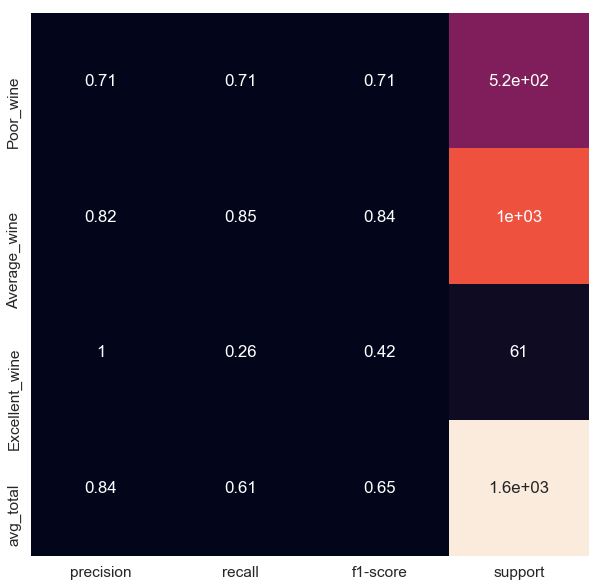

In [224]:
plot_classification_report(y_test, predicted_scaled)

Classification Report non scaled

In [227]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.32      0.98      0.49       524\n           1       0.63      0.02      0.03      1032\n           2       0.00      0.00      0.00        61\n\n    accuracy                           0.33      1617\n   macro avg       0.32      0.33      0.17      1617\nweighted avg       0.51      0.33      0.18      1617\n'

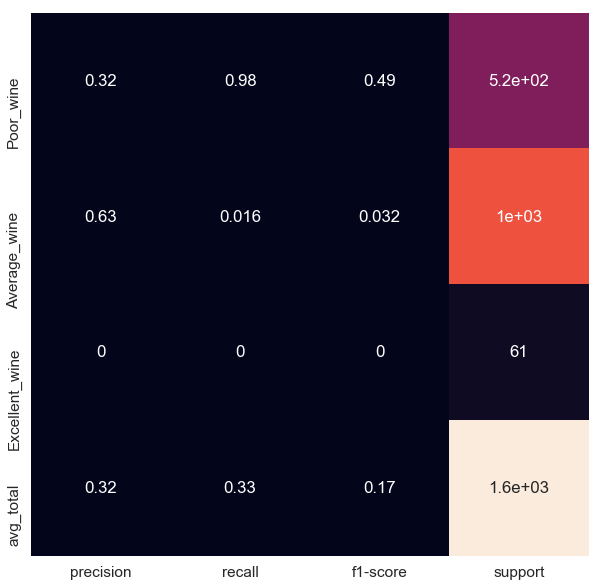

In [228]:
plot_classification_report(y_test, predicted)

We can see from both charts that precision, recall and f1-score are higher for scaled version of the data

## Confusion Matrix for Scaled and non-scaled

Confusion Matrix Scaled

In [229]:
matrix_data = confusion_matrix(y_test, predicted_scaled)

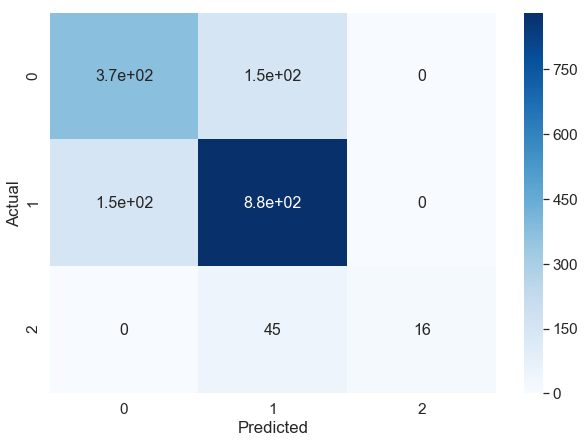

In [230]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [231]:
matrix_data = confusion_matrix(y_test, predicted)

Confusion Non Scaled

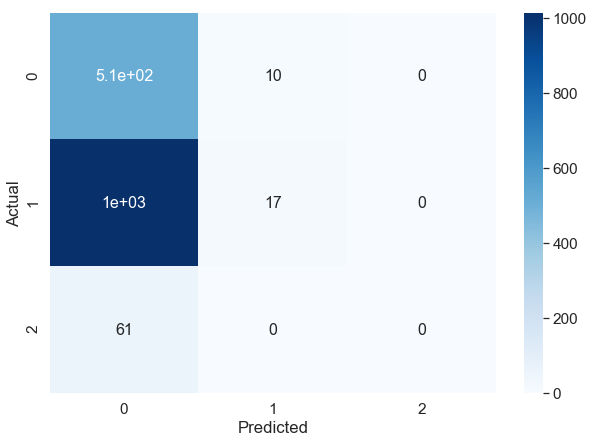

In [232]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Model Parameter Tuning to find best options

Score before tuning

In [238]:
RFmodel.score(X_test_scaled, y_test)

0.7866419294990723

Lets try to find the best tuning for our Model by using the Gridsearch Parameter method

In [234]:
#Finding best parameters for our Random Forest Model
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

RFC_CV = GridSearchCV(estimator=RFmodel, param_grid=param_grid, cv= 5)
RFC_CV.fit(X_train_scaled,  y_train)

#Best parameters for our svc model
RFC_CV.best_params_

{'max_features': 'log2', 'n_estimators': 200}

New Score result after using the best parameter generated from above

In [236]:
RFmodel = RandomForestClassifier(n_estimators=200, max_features='log2')
RFmodel.fit(X_train_scaled, y_train)
predicted_scaled = RFmodel.predict(X_test_scaled)
RFmodel.score(X_test_scaled, y_test)

0.7866419294990723

## Random Forest
Before and After Scaling Model Score
* RandomForest: 0.32838589981447125 ⇒  0.7847866419294991 <span style="font-weight:bold;color:green">(+)</span>

Before and After Tuning Model Score
* RandomForest: 0.7847866419294991 ⇒  0.7866419294990723 <span style="font-weight:bold;color:green">(+)</span>

................................................

# Gradient Boosting Model

In [244]:
model = GradientBoostingClassifier(max_depth=5)
model.fit(X_train_scaled, y_train)

predicted_scaled = model.predict(X_test_scaled)
predicted = model.predict(X_test)

Score for scaled and non scaled model test

In [245]:
model.score(X_test_scaled, y_test), model.score(X_test, y_test), 

(0.7649969078540507, 0.24304267161410018)

## Classification Report for Scaled and Non Scaled 

In [246]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Poor_wine', 'Average_wine', 'Excellent_wine']
    yticks += ['avg_total']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

In [247]:
classification_report(y_test, predicted_scaled)

'              precision    recall  f1-score   support\n\n           0       0.68      0.70      0.69       524\n           1       0.81      0.83      0.82      1032\n           2       0.75      0.25      0.37        61\n\n    accuracy                           0.76      1617\n   macro avg       0.75      0.59      0.63      1617\nweighted avg       0.76      0.76      0.76      1617\n'

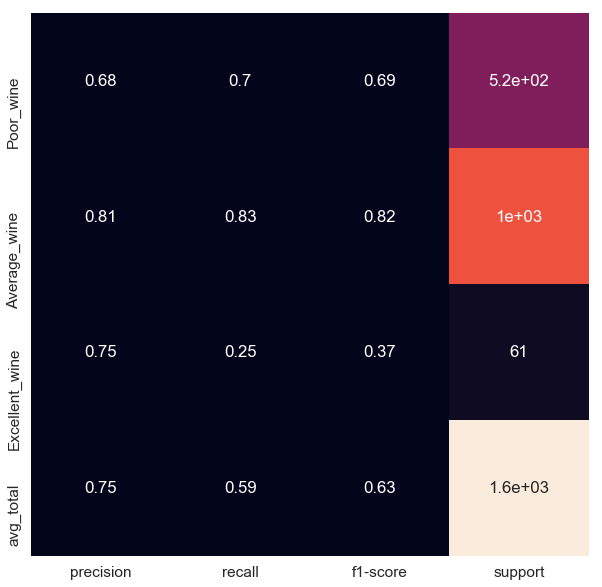

In [248]:
plot_classification_report(y_test, predicted_scaled)

Classification Report non scaled

In [249]:
classification_report(y_test, predicted)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.32      0.73      0.44       524\n           1       0.00      0.00      0.00      1032\n           2       0.03      0.20      0.05        61\n\n    accuracy                           0.24      1617\n   macro avg       0.12      0.31      0.16      1617\nweighted avg       0.10      0.24      0.14      1617\n'

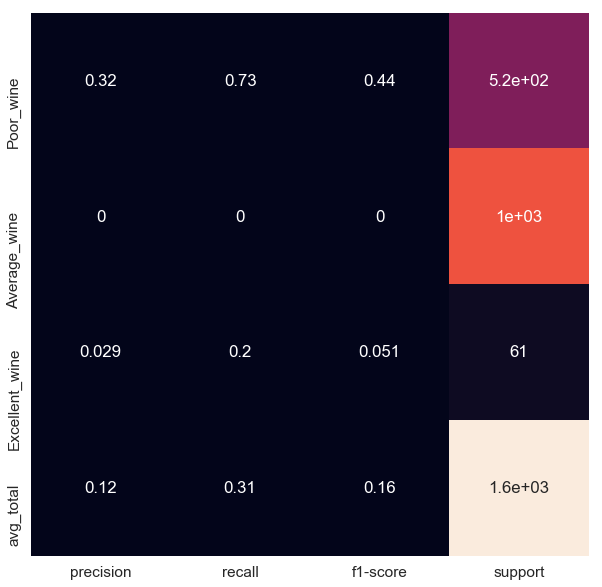

In [250]:
plot_classification_report(y_test, predicted)

We can see from both charts that precision, recall and f1-score are higher for scaled version of the data

## Confusion Matrix for Scaled and non-scaled

Confusion Matrix Scaled

In [251]:
matrix_data = confusion_matrix(y_test, predicted_scaled)

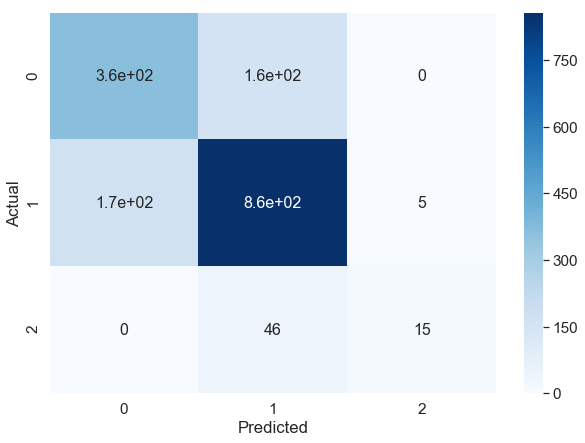

In [252]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [253]:
matrix_data = confusion_matrix(y_test, predicted)

Confusion Non Scaled

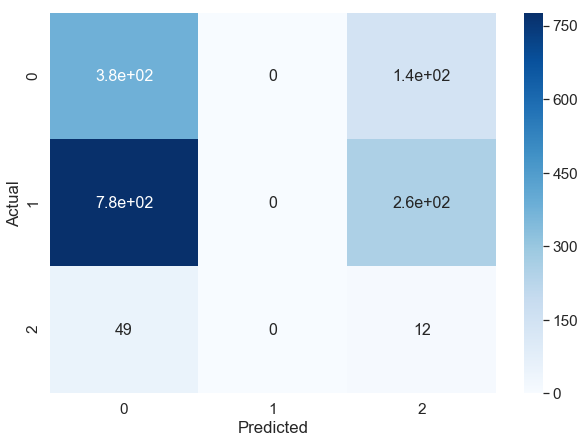

In [254]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Model Parameter Tuning to find best options

Score before tuning

In [255]:
model.score(X_test_scaled, y_test)

0.7649969078540507

Lets try to find the best tuning for our Model by using the Gridsearch Parameter method

In [256]:
#Finding best parameters for our Random Forest Model
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
model_cv.fit(X_train_scaled,  y_train)

#Best parameters for our GB model
model_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

New Score result after using the best parameter generated from above

In [257]:
model = GradientBoostingClassifier(max_depth=5, n_estimators=200, max_features='sqrt')
model.fit(X_train_scaled, y_train)
predicted_scaled = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.7631416202844774

## Gradient Boost
Before and After Scaling Model Score
* RandomForest: 0.24304267161410018 ⇒  0.7649969078540507 <span style="font-weight:bold;color:green">(+)</span>


Before and After Tuning Model Score
* RandomForest: 0.7649969078540507 ⇒  0.7631416202844774 <span style="font-weight:bold;color:red">(-)</span>

.....................................................................

# SupportVectorClassifier Model

In [258]:
model = SVC(gamma='scale')
model.fit(X_train_scaled, y_train)

predicted_scaled = model.predict(X_test_scaled)
predicted = model.predict(X_test)

Score for scaled and non scaled model test

In [262]:
model.score(X_test_scaled, y_test), model.score(X_test, y_test), 

(0.743351886209029, 0.3240568954854669)

## Classification Report for Scaled and Non Scaled 

In [264]:
classification_report(y_test, predicted_scaled)

'              precision    recall  f1-score   support\n\n           0       0.68      0.62      0.65       524\n           1       0.77      0.85      0.81      1032\n           2       0.00      0.00      0.00        61\n\n    accuracy                           0.74      1617\n   macro avg       0.48      0.49      0.49      1617\nweighted avg       0.71      0.74      0.73      1617\n'

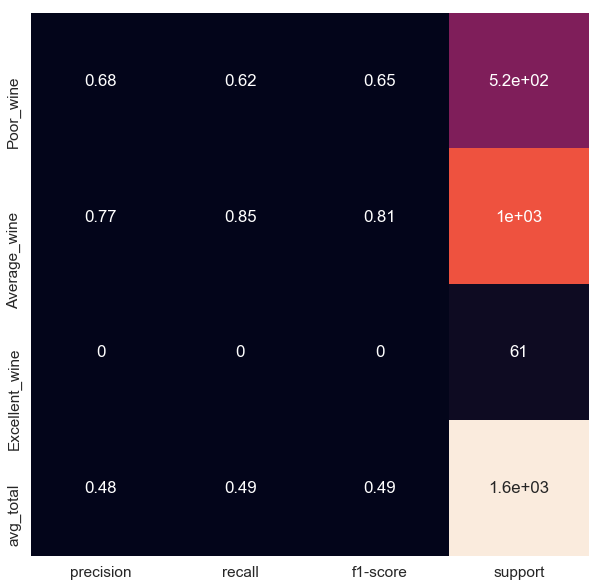

In [265]:
plot_classification_report(y_test, predicted_scaled)

Classification Report non scaled

In [266]:
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.32      1.00      0.49       524\n           1       0.00      0.00      0.00      1032\n           2       0.00      0.00      0.00        61\n\n    accuracy                           0.32      1617\n   macro avg       0.11      0.33      0.16      1617\nweighted avg       0.11      0.32      0.16      1617\n'

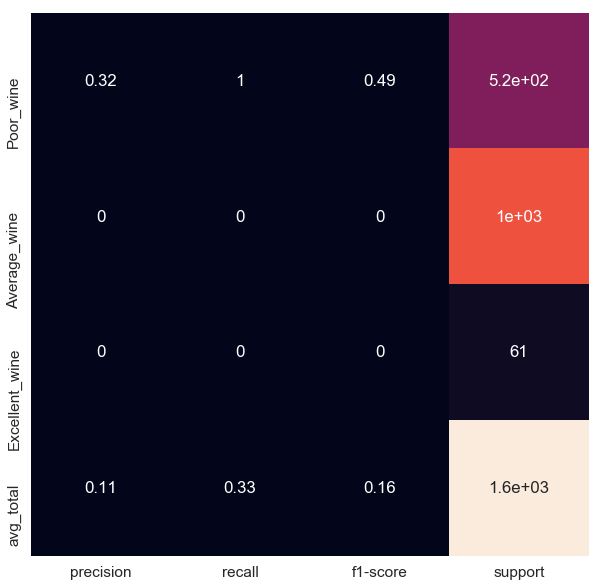

In [267]:
plot_classification_report(y_test, predicted)

We can see from both charts that precision, recall and f1-score are higher for scaled version of the data

## Confusion Matrix for Scaled and non-scaled

Confusion Matrix Scaled

In [268]:
matrix_data = confusion_matrix(y_test, predicted_scaled)

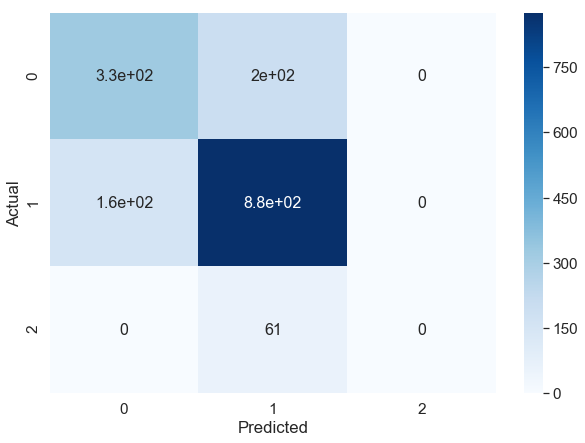

In [269]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [270]:
matrix_data = confusion_matrix(y_test, predicted)

Confusion Non Scaled

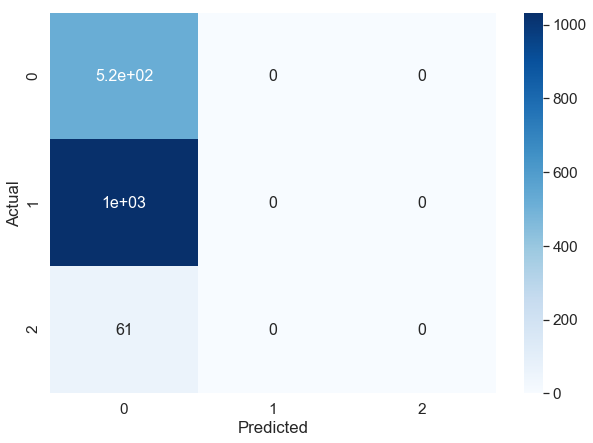

In [271]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Model Parameter Tuning to find best options

Score before tuning

In [274]:
model.score(X_test_scaled, y_test)

0.743351886209029

Lets try to find the best tuning for our Model by using the Gridsearch Parameter method

In [276]:
#Finding best parameters for our Random Forest Model
param_grid = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

model_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
model_cv.fit(X_train_scaled,  y_train)

#Best parameters for our GB model
model_cv.best_params_

{'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}

New Score result after using the best parameter generated from above

In [277]:
model = SVC(gamma=0.8, C=1.4, kernel='rbf')
model.fit(X_train_scaled, y_train)
predicted_scaled = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.7705627705627706

## SVC
Before and After Scaling Model Score
* RandomForest: 0.3240568954854669 ⇒  0.743351886209029 <span style="font-weight:bold;color:green">(+)</span>

Before and After Tuning Model Score with GridsearchCV
* RandomForest: 0.743351886209029 ⇒  0.7705627705627706 <span style="font-weight:bold;color:green">(+)</span>

......................................................................

# KNN Model

In [279]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

predicted_scaled = model.predict(X_test_scaled)
predicted = model.predict(X_test)

Score for scaled and non scaled model test

In [281]:
model.score(X_test_scaled, y_test), model.score(X_test, y_test), 

(0.7235621521335807, 0.32343846629560913)

## Classification Report for Scaled and Non Scaled 

In [282]:
classification_report(y_test, predicted_scaled)

'              precision    recall  f1-score   support\n\n           0       0.63      0.63      0.63       524\n           1       0.77      0.81      0.79      1032\n           2       0.43      0.05      0.09        61\n\n    accuracy                           0.72      1617\n   macro avg       0.61      0.50      0.50      1617\nweighted avg       0.71      0.72      0.71      1617\n'

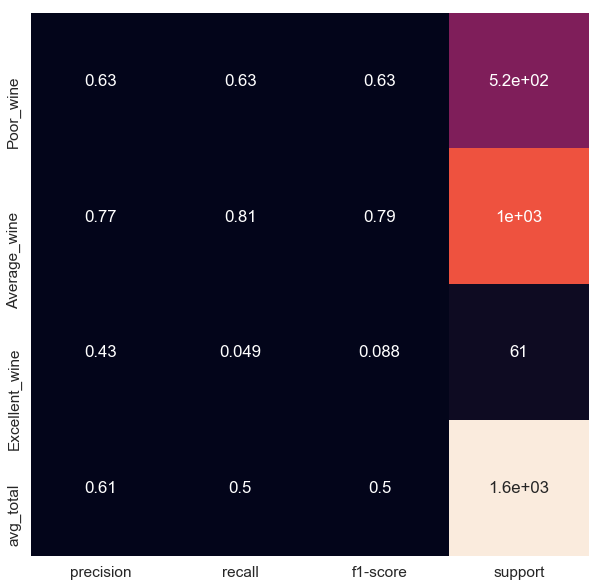

In [283]:
plot_classification_report(y_test, predicted_scaled)

Classification Report non scaled

In [284]:
classification_report(y_test, predicted)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.32      1.00      0.49       524\n           1       0.00      0.00      0.00      1032\n           2       0.00      0.00      0.00        61\n\n    accuracy                           0.32      1617\n   macro avg       0.11      0.33      0.16      1617\nweighted avg       0.10      0.32      0.16      1617\n'

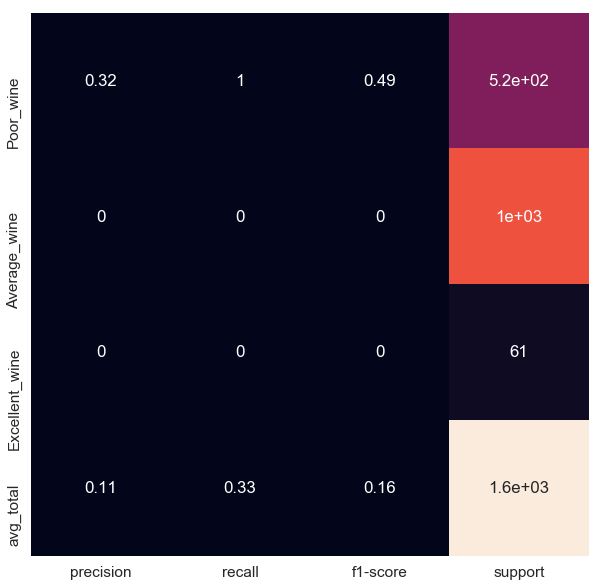

In [285]:
plot_classification_report(y_test, predicted)

We can see from both charts that precision, recall and f1-score are higher for scaled version of the data

## Confusion Matrix for Scaled and non-scaled

Confusion Matrix Scaled

In [286]:
matrix_data = confusion_matrix(y_test, predicted_scaled)

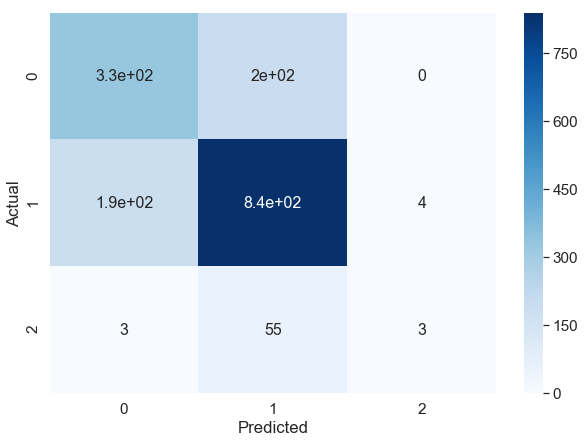

In [287]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [288]:
matrix_data = confusion_matrix(y_test, predicted)

Confusion Non Scaled

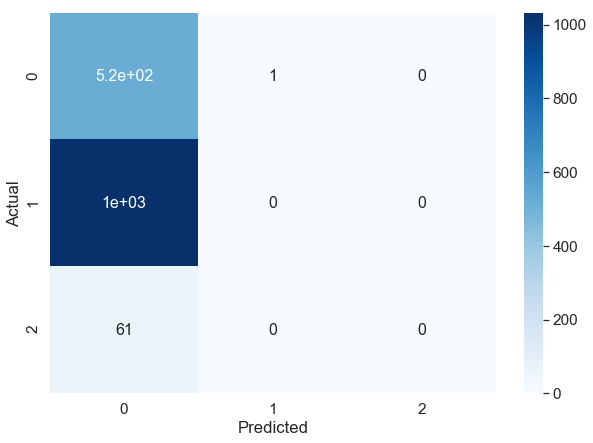

In [289]:
gd_cm = pd.DataFrame(matrix_data, columns=np.unique(y_test), index = np.unique(y_test))
gd_cm.index.name = 'Actual'
gd_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(gd_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Model Parameter Tuning to find best options

Score before tuning

In [291]:
model.score(X_test_scaled, y_test)

0.7235621521335807

Lets try to find the best tuning for our Model by using the Gridsearch Parameter method

In [293]:
#Finding best parameters for our Model
param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9], 
    'metric': ['minkowski', 'euclidean', 'manhattan'], 
    'weights': ['uniform', 'distance']
}

model_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
model_cv.fit(X_train_scaled,  y_train)

#Best parameters for our GB model
model_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

New Score result after using the best parameter generated from above

In [294]:
model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9, weights = 'distance')
model.fit(X_train_scaled, y_train)
predicted_scaled = model.predict(X_test_scaled)
model.score(X_test_scaled, y_test)

0.7705627705627706

## KNN
Before and After Scaling Model Score
* RandomForest: 0.32343846629560913 ⇒  0.7235621521335807 <span style="font-weight:bold;color:green">(+)</span>

Before and After Tuning Model Score with GridsearchCV
* RandomForest: 0.7235621521335807 ⇒  0.7705627705627706 <span style="font-weight:bold;color:green">(+)</span>

..........................................................

# Conclusions

We split the qaulity colunm into 3 different classes, poor, average and excellent. We further compared standard scaling against no scaled data to see which one perfomed better. And lastly, we used gridsearchCV to tune the parameters to get the best results as seen below.

## Random Forest
Before and After Scaling Model Score
* RandomForest: 0.32838589981447125 ⇒  0.7847866419294991 <span style="font-weight:bold;color:green">(+)</span>
Before and After Tuning Model Score
* RandomForest: 0.7847866419294991 ⇒  0.7866419294990723 <span style="font-weight:bold;color:green">(+)</span>


## Gradient Boost
Before and After Scaling Model Score
* RandomForest: 0.24304267161410018 ⇒  0.7649969078540507 <span style="font-weight:bold;color:green">(+)</span>
Before and After Tuning Model Score
* RandomForest: 0.7649969078540507 ⇒  0.7631416202844774 <span style="font-weight:bold;color:red">(-)</span>


## SVC
Before and After Scaling Model Score
* RandomForest: 0.3240568954854669 ⇒  0.743351886209029 <span style="font-weight:bold;color:green">(+)</span>
Before and After Tuning Model Score with GridsearchCV
* RandomForest: 0.743351886209029 ⇒  0.7705627705627706 <span style="font-weight:bold;color:green">(+)</span>


## KNN
Before and After Scaling Model Score
* RandomForest: 0.32343846629560913 ⇒  0.7235621521335807 <span style="font-weight:bold;color:green">(+)</span>
Before and After Tuning Model Score with GridsearchCV
* RandomForest: 0.7235621521335807 ⇒  0.7705627705627706 <span style="font-weight:bold;color:green">(+)</span>
    

From the above results, We so an increase using standard scaling for all 4 models with significantly improved results. And for GridsearchCV model tuning, the excption was Gradient Boost which had a lower score after tuning the n_estimators and 
max_features, perhaps no parameter tuning is needed or other parameters should be tested to improve the result.